In [1]:
library(Seurat)
library(dplyr)
library(ggpubr)
library(ggplot2)
library(ggbeeswarm)

load('20230227_pheno_figure.RDATA')



Warning message:
"package 'Seurat' was built under R version 4.1.3"
Attaching SeuratObject

Attaching sp

Warning message:
"package 'dplyr' was built under R version 4.1.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"package 'ggbeeswarm' was built under R version 4.1.3"


In [2]:
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.res = 300)

UMAP_theme <- theme_bw()+theme(axis.text.y = element_blank(), 
                               axis.text.x = element_blank(), 
                               axis.ticks.x= element_blank(),
                               axis.ticks.y= element_blank(),
                               axis.title.x= element_blank(),
                               axis.title.y= element_blank(),
                               strip.text.x = element_text(size = 8),
                               panel.grid.major = element_blank(),
                               panel.grid.minor = element_blank(),
                               panel.border = element_blank(),
                               panel.background = element_rect(colour = "black", fill = NA,size=.355),
                               legend.position = "none",
                               plot.title = element_text(hjust = 0.5, size = 8))

remove_grid = theme_bw() + theme( panel.grid.major = element_blank(),
                               panel.grid.minor = element_blank())

Axis_themes <- theme(plot.title = element_text(size = 8),
                     axis.title = element_text(size = 8), 
                     axis.text = element_text(size = 8),
                     axis.text.x = element_text(size = 8),
                     legend.text = element_text(size =8),
                     legend.title = element_text(size = 8),
                     strip.text.x = element_text(size = 8), 
                    axis.line = element_line(size = .355), 
                    axis.ticks = element_line(size = .177))


Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."
Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."


In [3]:
meta = readRDS('BCRmeta.RDS')
seurat@meta.data[,colnames(meta)[24:ncol(meta)]] = meta[colnames(seurat), 24:ncol(meta)] 

In [4]:
library(ggrastr)
options(repr.plot.width = 1.75, repr.plot.height = 1.75, repr.plot.res = 300)
cbp1 <- c("grey90", "#E69F00", "#56B4E9", "#009E73",
          "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

#ggplot(seurat@meta.data[sample(rownames(seurat@meta.data)),], aes(x = UMAP1, y = UMAP2, color = factor(recovery))) + geom_point_rast(raster.dpi = 1000, size = .6, stroke = 0) + UMAP_theme + 
# scale_color_manual(values = cbp1[c(1,2,3,4)], labels = c('No recovery', 'Light chain', 'Heavy chain', 'Paired chains'))

#ggsave('RepertoirePanels/umap_recovery.pdf', height = 1.8, width = 1.8, useDingbats = FALSE)

Warning message:
"package 'ggrastr' was built under R version 4.1.3"


`summarise()` has grouped output by 'Monkey'. You can override using the `.groups` argument.


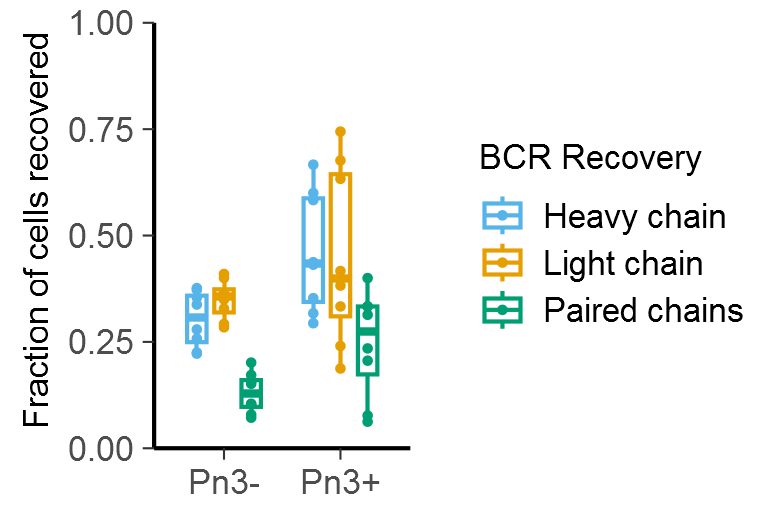

In [5]:
library(reshape2)
options(repr.plot.width = 2.6)
a = seurat@meta.data %>% group_by(Monkey, Fraction) %>% summarize(igh_frac = sum(IGH_recovery)/n(), igl_frac = sum(IGL_recovery)/n(), paired = sum(IGH_recovery*IGL_recovery)/n())
a = melt(a, id.vars = c('Monkey', 'Fraction'))

#a$variable = paste0(a$Fraction, a$variable)
ggplot(a, aes(x = Fraction, y = value, color = variable))  + geom_boxplot( position = position_dodge(width = .7), width = .5, size = .355) + geom_point(position = position_dodge(width = .7), size = .3) + theme_classic() + 
scale_y_continuous(expand = c(0,0), limits = c(0, 1)) + Axis_themes  + labs(color = 'BCR Recovery', x = c(), y = 'Fraction of cells recovered') + scale_color_manual(values = cbp1[c(3,2,4)], labels = c('Heavy chain', 'Light chain', 'Paired chains')) + 
theme(legend.key.size = unit(.4, 'cm'))

ggsave('RepertoirePanels/recovery_bars.pdf', height = 1.8, width = 2.3, useDingbats = FALSE)

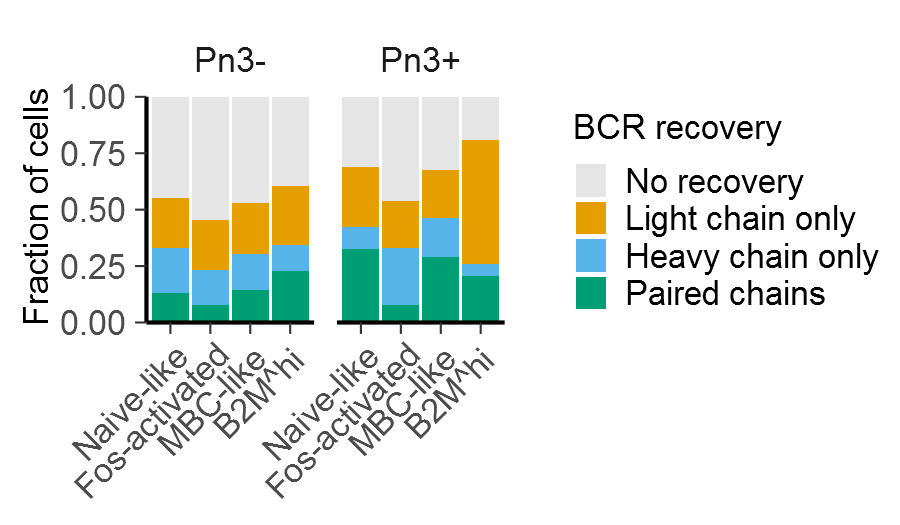

In [6]:
options(repr.plot.width = 3)
seurat$recovery_word = seurat$recovery
seurat$recovery_word[seurat$recovery == 0] = 'No recovery'
seurat$recovery_word[seurat$recovery == 1] = 'Light chain only'
seurat$recovery_word[seurat$recovery == 2] = 'Heavy chain only'
seurat$recovery_word[seurat$recovery == 3] = 'Paired chains'

seurat$recovery_word = factor(seurat$recovery_word, c('No recovery', 'Light chain only', 'Heavy chain only', 'Paired chains'))
recovery_palette =  c( 'grey90',cbp1[ c(2,3,4)])
names(recovery_palette) = levels(seurat$recovery_word)
ggplot(seurat@meta.data, aes(x = cluster_name, fill = factor(recovery_word) )) +geom_bar(position = 'fill') +
theme(axis.text.x = element_text(angle = 45, hjust = 1)) + facet_wrap('Fraction') +
scale_fill_manual(values = recovery_palette, limits = (levels(seurat$recovery_word))) + theme_classic() +  Axis_themes + 
theme(legend.key.size = unit(.3, 'cm'), axis.text.x = element_text(angle = 45, hjust = 1), strip.background = element_blank()) + 
 labs(x = c(), y = 'Fraction of cells', fill = 'BCR recovery') + scale_y_continuous(expand = c(0,0))
ggsave('RepertoirePanels/pheno_recovery.pdf', height = 1.8, width = 3.4, useDingbats = FALSE)

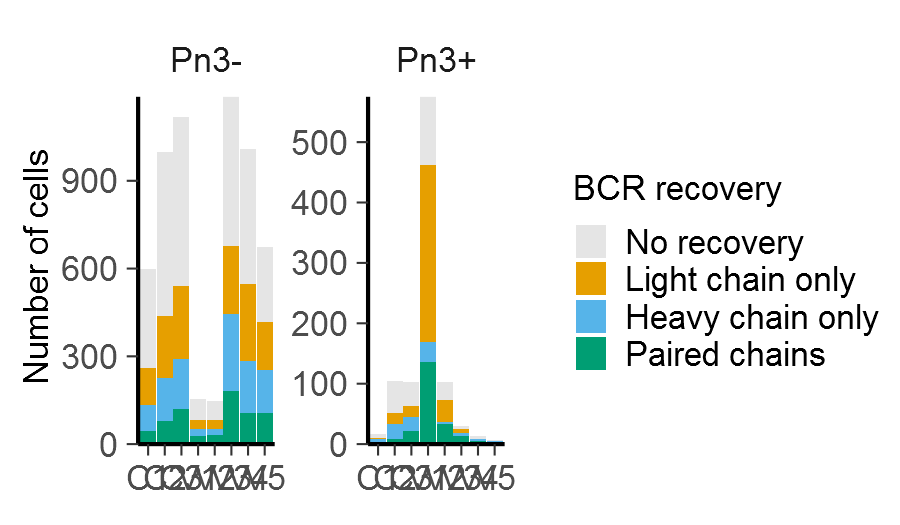

In [7]:
ggplot(seurat@meta.data, aes(x = Monkey, fill = recovery_word)) + facet_wrap('Fraction') + geom_bar() +  theme_classic() +  Axis_themes + facet_wrap('Fraction', scales = 'free') +
scale_fill_manual(values = recovery_palette, limits = (levels(seurat$recovery_word))) +
theme(legend.key.size = unit(.3, 'cm'), strip.background = element_blank()) + 
labs(x = c(), y = 'Number of cells', fill = 'BCR recovery') + scale_y_continuous(expand = c(0,0)) +
scale_x_discrete(labels =c ('C1', "C2", 'C3', 'V1', 'V2', 'V3', 'V4', 'V5'))


ggsave('RepertoirePanels/recovery_number.pdf', height = 1.8, width = 4.5, useDingbats = FALSE)

In [8]:
library(shazam)
cell_consensus_hc =readRDS('cell_consensus_hc.RDS')

#cell_consensus_hc = observedMutations(df, sequenceColumn = 'CONSENSUS_SEQUENCE', germlineColumn = 'GERMLINE_SEQUENCE_D_MASK', 
 #                                     frequency = TRUE) %>% mutate(MU_FREQ_TOTAL = mu_freq_seq_r + mu_freq_seq_s) %>% as.data.frame()

Warning message:
"package 'shazam' was built under R version 4.1.3"
As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.



In [9]:
table(seurat@meta.data$Monkey, seurat@meta.data$Fraction)

         
          Pn3- Pn3+
  A18N104  598   16
  A18N107  996  104
  A18N108 1118  102
  A19N274  151  575
  A19N275  144  102
  A19N286 1187   30
  A20N007 1006   12
  A20N023  672    6

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4."
Warning message:
"Removed 5074 rows containing non-finite values (`stat_ydensity()`)."
Warning message:
"Removed 5074 rows containing non-finite values (`stat_boxplot()`)."
Warning message:
"Removed 5074 rows containing non-finite values (`stat_signif()`)."
Warning message:
"Removed 5074 rows containing non-finite values (`stat_ydensity()`)."
Warning message:
"Removed 5074 rows containing non-finite values (`stat_boxplot()`)."
Warning message:
"Removed 5074 rows containing non-finite values (`stat_signif()`)."
Warning message:
"Removed 4236 rows containing non-finite values (`stat_ydensity()`)."
Warning message:
"Removed 4236 rows containing non-finite values (`stat_boxplot()`)."
Warning message:
"Removed 4236 rows containing non-finite values (`stat_signi

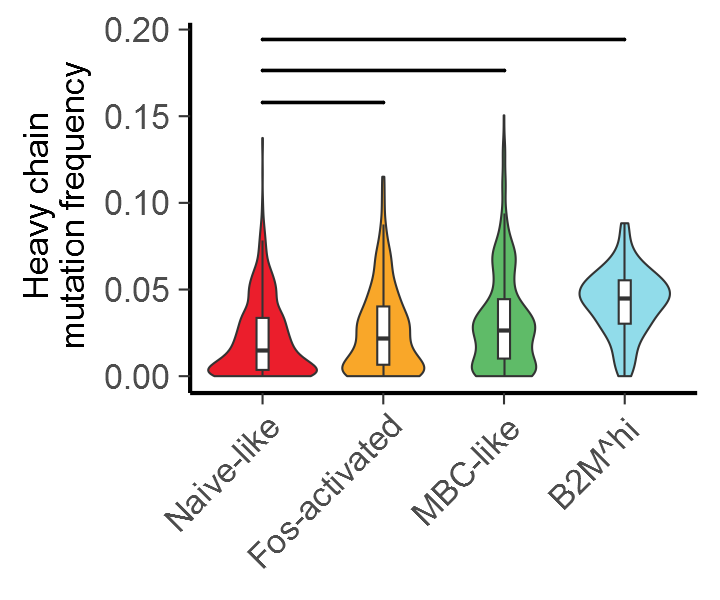

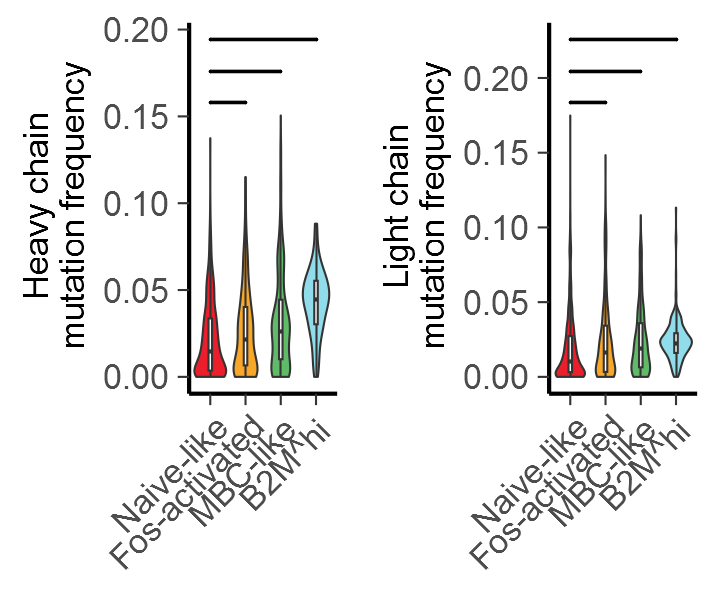

In [10]:
options(repr.plot.height = 2, repr.plot.width = 2.4, repr.plot.res = 300)

#seurat$mu_freq_seq_r = cell_consensus_hc$mu_freq_seq_s[match(seurat$id, cell_consensus_hc$LANE_ID)]

g1= ggplot(seurat@meta.data, aes(x = cluster_name, y = IGH_MU_FREQ)) + geom_violin(aes(fill = cluster_name), size = .355/2) + geom_boxplot(width = .1,  size = .355/2,outlier.size = -1) + theme_classic() + 
scale_fill_manual(values = phenotype_palette) + Axis_themes + labs(x = c(), y = 'Heavy chain\nmutation frequency', fill = c()) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + guides(fill = FALSE) + 
stat_compare_means(comparison = list(c(1,2), c(1,3), c(1,4)), label = 'p.signif', tip.length = 0)
g1$layers[[3]]$aes_params$textsize <- 2.11*8.6

g1
g2 = ggplot(seurat@meta.data, aes(x = cluster_name, y = IGL_MU_FREQ)) + geom_violin(aes(fill = cluster_name), size = .355/2) + geom_boxplot(width = .1, size = .355/2, outlier.size =-1)+ theme_classic() + 
scale_fill_manual(values = phenotype_palette) + Axis_themes + labs(x = c(), y = 'Light chain\nmutation frequency', fill = c()) + theme(axis.text.x = element_text(angle = 45, hjust = 1))+ guides(fill = FALSE)+
stat_compare_means(comparison = list(c(1,2), c(1,3), c(1,4)), label = 'p.signif', tip.length = 0)
g2$layers[[3]]$aes_params$textsize <- 2.11*8.6


cowplot::plot_grid(g1, g2)
ggsave('RepertoirePanels/mutation_freq.pdf', height = 1.8, width = 2.8, useDingbats = FALSE)

In [11]:
library(ggrastr)
library(ggthemes)
library(viridis)
options(repr.plot.width = 1.75, repr.plot.height = 1.75, repr.plot.res = 300)

isotype_pal = c(tableau_color_pal(palette = 'Tableau 20')(20)[c(1,2,3,11)] , 'grey90')
names(isotype_pal) = c("IGHM", 'IGHD', 'IGHG', 'IGHA', 'No recovery')
seurat$ISOTYPE = as.character(seurat$ISOTYPE)
seurat$ISOTYPE[is.na(seurat$ISOTYPE)] = 'No recovery'
seurat$IGH_MU_FREQ_PLOT = ifelse(seurat$IGH_MU_FREQ > .1, .1, seurat$IGH_MU_FREQ)
#ggplot(seurat@meta.data[sample(rownames(seurat@meta.data)),] %>% arrange(ISOTYPE != 'No recovery'), aes(x = UMAP1, y = UMAP2, color = IGH_MU_FREQ_PLOT)) + geom_point_rast(raster.dpi = 1000, size = .6, stroke = 0) + UMAP_theme + 
# scale_color_viridis(option = 2, direction = -1, na.value = 'grey80')

#ggsave('RepertoirePanels/umap_mutation.pdf', height = 1.8, width = 1.8, useDingbats = FALSE)

Warning message:
"package 'viridis' was built under R version 4.1.3"
Loading required package: viridisLite

Warning message:
"package 'viridisLite' was built under R version 4.1.3"


In [12]:
library(ggrastr)
options(repr.plot.width = 1.75, repr.plot.height = 1.75, repr.plot.res = 300)

isotype_pal = c(tableau_color_pal(palette = 'Tableau 20')(20)[c(1,2,3,11)] , 'grey90')
names(isotype_pal) = c("IGHM", 'IGHD', 'IGHG', 'IGHA', 'No recovery')
seurat$ISOTYPE = as.character(seurat$ISOTYPE)
seurat$ISOTYPE[is.na(seurat$ISOTYPE)] = 'No recovery'

#ggplot(seurat@meta.data[sample(rownames(seurat@meta.data)),] %>% arrange(ISOTYPE != 'No recovery'), aes(x = UMAP1, y = UMAP2, color = factor(ISOTYPE))) + geom_point_rast(raster.dpi = 1000, size = .6, stroke = 0) + UMAP_theme + 
# scale_color_manual(values = isotype_pal)

#ggsave('RepertoirePanels/umap_isotype.pdf', height = 1.8, width = 1.8, useDingbats = FALSE)

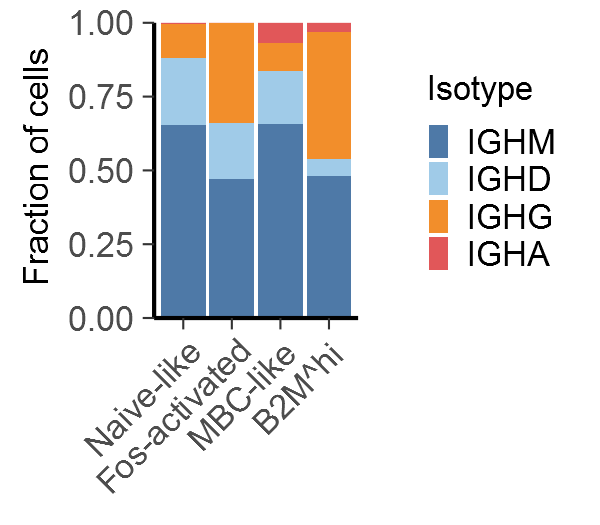

In [13]:
library(ggthemes)
options(repr.plot.width = 2)
seurat$ISOTYPE = factor(seurat$ISOTYPE, levels = rev(c('IGHM', 'IGHD', 'IGHG','IGHA')))
ggplot(seurat@meta.data %>% filter(!is.na(ISOTYPE)), aes(x = cluster_name, fill = ISOTYPE)) + geom_bar(position = 'fill')  + 
scale_fill_manual(values = tableau_color_pal(palette = 'Tableau 20')(20)[c(1,2,3,11)], 
                 limits = c("IGHM", 'IGHD', 'IGHG', 'IGHA')) + theme_classic() + scale_y_continuous(expand = c(0,0))+ Axis_themes + theme(legend.key.size = unit(.2, 'cm')) + 
labs( x= c(), y = 'Fraction of cells', fill = 'Isotype')+ theme(axis.text.x = element_text(angle = 45, hjust = 1))

ggsave('RepertoirePanels/isotype_bars.pdf', height = 1.8, width = 2)

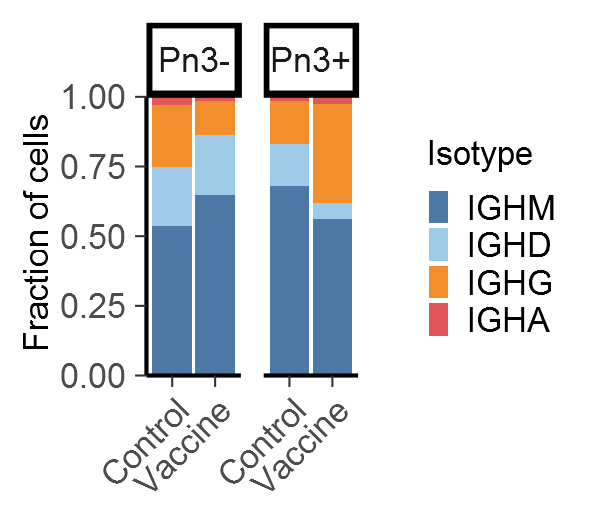

In [14]:
library(ggthemes)
options(repr.plot.width = 2)
seurat$ISOTYPE = factor(seurat$ISOTYPE, levels = rev(c('IGHM', 'IGHD', 'IGHG','IGHA')))
ggplot(seurat@meta.data %>% filter(!is.na(ISOTYPE)), aes(x = Group, fill = ISOTYPE)) + geom_bar(position = 'fill')  + 
scale_fill_manual(values = tableau_color_pal(palette = 'Tableau 20')(20)[c(1,2,3,11)], 
                 limits = c("IGHM", 'IGHD', 'IGHG', 'IGHA')) + theme_classic() + scale_y_continuous(expand = c(0,0))+ Axis_themes + theme(legend.key.size = unit(.2, 'cm')) + 
labs( x= c(), y = 'Fraction of cells', fill = 'Isotype')+ theme(axis.text.x = element_text(angle = 45, hjust = 1)) + facet_wrap('Fraction')
#ggsave('RepertoirePanels/isotype_bars.pdf', height = 1.8, width = 2)

`summarise()` has grouped output by 'both', 'Group', 'Monkey', 'Fraction'. You can override using the `.groups` argument.


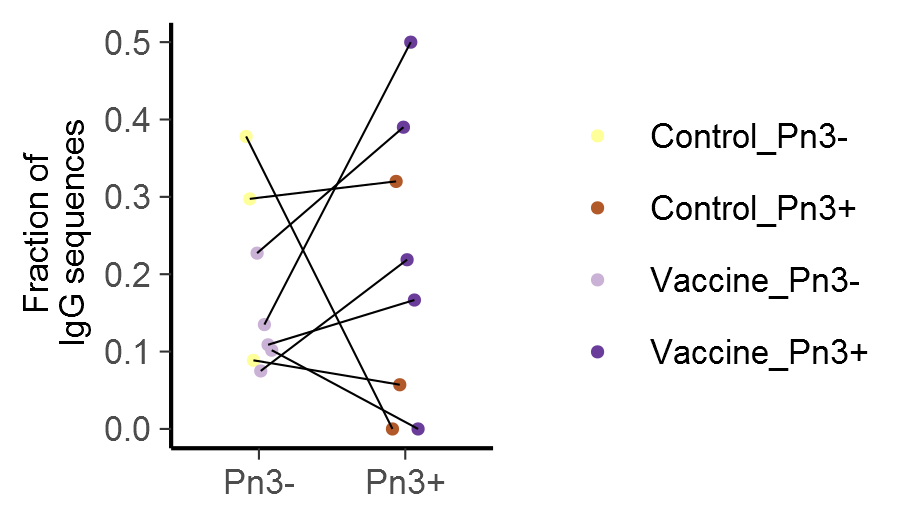

In [15]:
options(repr.plot.width = 3)
pd = position_dodge(width = .2)
df = seurat@meta.data %>% filter(!is.na(IGHV)) %>% group_by(both, Group, Monkey, Fraction, ISOTYPE ) %>%  summarize(n = n()) %>% mutate(p = n/sum(n) ) %>% tidyr::complete(ISOTYPE, fill = list(p= 0))
ggplot(df %>% filter(ISOTYPE == 'IGHG'), aes(x = Fraction, y = p, group = Monkey, color = both)) + geom_point(position = pd, size = .6) + geom_line(position = pd, color = 'black', size = .177) +  theme_classic() + Axis_themes +
scale_color_manual(values = both_palette) + labs(x = c(), y = 'Fraction of\nIgG sequences') + labs(color = c())
ggsave('RepertoirePanels/igg_fraction.pdf', height = 1.8, width = 2.5)


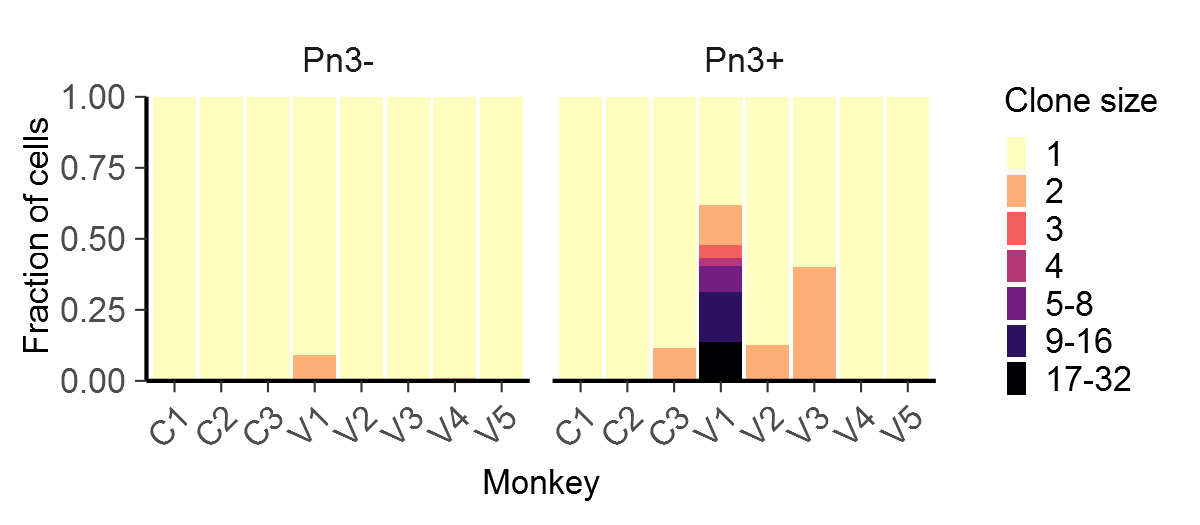

In [16]:
library(viridis)
options(repr.plot.width = 4)
seurat$clone = seurat$CLONE
seurat$clone[is.na(seurat$IGHV)] = NA
tab = table(seurat$clone)
seurat$clone_size = tab[seurat$clone]
seurat$clone_size[is.na(seurat$clone)] = NA
seurat$clone_size_plot = cut(seurat$clone_size, c(0, 1, 2, 3, 4, 8, 16, 32, 64))
ggplot(seurat@meta.data %>% filter(!is.na(clone)), aes(x = Monkey, fill = factor(clone_size_plot))) + geom_bar(position = 'fill') + facet_grid(~Fraction, scales = 'free', space = 'free'

                                                                                                                                         ) + 
scale_fill_viridis_d(option = 2, direction =-1, labels = c(1, 2, 3, 4, '5-8', '9-16', '17-32', '33-40') ) + 
theme_classic() + Axis_themes + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + theme(strip.background = element_blank(), legend.key.size = unit(.2, 'cm')) + 
labs(x = c('Monkey'), y  = 'Fraction of cells') + scale_y_continuous(expand = c(0,0)) +labs(fill = 'Clone size') +
scale_x_discrete(labels =c ('C1', 'C2', 'C3', 'V1', 'V2', 'V3', 'V4', 'V5'))

ggsave('RepertoirePanels/expand.pdf', height = 2, width = 4, useDingbats = FALSE)

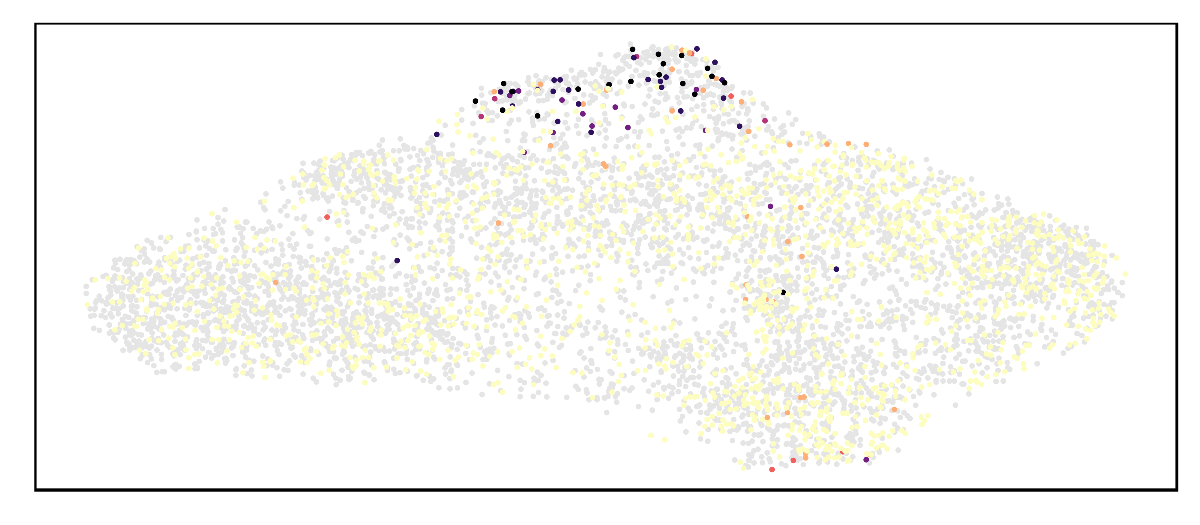

In [17]:

ggplot(seurat@meta.data %>% arrange(!is.na(clone_size_plot)) , aes(x = UMAP1, y = UMAP2, color = clone_size_plot)) + geom_point_rast(raster.dpi = 1000, size = .6, stroke = 0)+ scale_color_viridis_d(option = 2, direction = -1, na.value = 'grey90') + UMAP_theme
ggsave('RepertoirePanels/umap_size.pdf', height = 1.8, width = 1.8, useDingbats = FALSE)

In [18]:
getwd()

[1] "L:/Duncan/scBCR_method/Pn3Pilot_figures"

In [19]:
lc = readRDS('lc.RDS')

In [20]:
library(alakazam)
seurat$JUNCTION = NA
seurat$JUNCTION = cell_consensus_hc$JUNCTION[match(seurat$id, cell_consensus_hc$LANE_ID)]
seurat@meta.data %>% filter(Fraction == 'Pn3+', Group == 'Control', clone_size > 1) %>% select(bc, cluster_name, IGHV, IGH_CDR3,IGHJ,, IGL_CDR3, Monkey, Fraction,ISOTYPE, IGH_MU_FREQ, JUNCTION) %>% 
mutate(translateDNA(JUNCTION))

Warning message:
"package 'alakazam' was built under R version 4.1.3"
As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.



,bc,cluster_name,IGHV,IGH_CDR3,IGHJ,IGL_CDR3,Monkey,Fraction,ISOTYPE,IGH_MU_FREQ,JUNCTION,translateDNA(JUNCTION)
,<chr>,<fct>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<fct>,<dbl>,<chr>,<chr>
AC1_309,GAGCGGAGCTCT,MBC-like,IGHV3S42*01,YYCADGRLAL,IGHJ4*01,NA,A18N108,Pn3+,IGHM,0.12890625,TATTATTGTGCGGATGGTAGACTGGCTCTGG,YYCADGRLAL
AC1_331,GCATTAGGAAAC,MBC-like,IGHV3S42*01,YYCADGRLAL,IGHJ4*01,NA,A18N108,Pn3+,IGHM,0.12890625,TATTATTGTGCGGATGGTAGACTGGCTCTGG,YYCADGRLAL
AC1_407,GTCGTTTCAGGC,MBC-like,IGHV3-28*02,YYCARDPGGYYC,IGHJ4*01,NA,A18N108,Pn3+,IGHD,0.04135338,TGTGCGAGAGACCCTGGTGGTTATTACTGCTCCTGG,CARDPGGYYCSW
AC1_511,TTCACAGGTGGG,MBC-like,IGHV3-28*02,YYCARDPGGYYC,IGHJ4*01,NA,A18N108,Pn3+,IGHD,0.04182510,TGTGCGAGAGACCCTGGTGGTTATTACTGCTCCTGG,CARDPGGYYCSW


In [21]:
library(RColorBrewer)
options(repr.plot.width = 4, repr.plot.height = 4)
tab = table(seurat$clone, seurat$Fraction) 
tab = tab[rowSums(tab) > 1,]
tab = tab[order(apply(tab, 1, which.max)),]
library(pheatmap)
meta = data.frame(row.names = rownames(tab), monkey = substring(rownames(tab), 1, 7), treatment = ifelse(substring(rownames(tab), 1, 3) == 'A18', 'Control', 'Vaccine'))
treat_pal = brewer.pal(6, 'Paired')[c(6,2)]
names(treat_pal) = c("Vaccine", 'Control')
monkey_pal = tableau_color_pal('Classic 10')(5)
names(monkey_pal) = unique(meta$monkey)

pheatmap(tab/rowSums(tab), color = colorRampPalette(c('white', 'purple'))(100), fontsize = 6, cluster_rows = FALSE, cluster_cols = FALSE, border_col = 'black', 
        cellheight = 5, cellwidth = 5, show_rownames = FALSE, show_colnames = TRUE, 
        annotation_row = meta, annotation_color = list(treatment = treat_pal, monkey = monkey_pal), width = 1.5, height = 2, filename = 'RepertoirePanels/partition.pdf')

Warning message:
"package 'RColorBrewer' was built under R version 4.1.3"


In [22]:
options(warn = -1, repr.plot.width = 2, repr.plot.height = 2)
library(ggrepel)
library(alakazam)

cell_consensus_hc = readRDS('cell_consensus_hc.RDS')
cell_consensus_hc$Group = seurat$Group[match(cell_consensus_hc$LANE_ID, seurat$id)]
cell_consensus_hc$Fraction = seurat$Fraction[match(cell_consensus_hc$LANE_ID, seurat$id)]
cell_consensus_hc$axis = 'NonAg'
cell_consensus_hc$axis[cell_consensus_hc$Group == "Vaccine" & cell_consensus_hc$Fraction == 'Pn3+'] = 'Ag'
cell_consensus_hc$axis[cell_consensus_hc$Group == "Control" & cell_consensus_hc$Fraction == 'Pn3+'] = NA

df = countGenes(cell_consensus_hc, gene = 'GERMLINE_V_CALL', groups = c('axis'))
df = dcast(df, gene~axis, value.var = 'seq_count')
df[is.na(df)] = 0
df$pval = NA
for (a in 1:nrow(df)) {
    df$pval[a] = prop.test(c(df[a, 2], df[a, 3]), c(sum(df[,2]), sum(df[,3])), alternative = 'greater')$p.value 
}

df$pval_adj = p.adjust(df$pval)
df2 = countGenes(cell_consensus_hc, gene = 'GERMLINE_V_CALL', groups = c('axis'))
df2 = dcast(df2, gene~axis, value.var = 'seq_freq')


df2$sig = factor(as.numeric(df$pval_adj < .01))

df2$NonAg[is.na(df2$NonAg)] =0
g1 = ggplot(df2, aes(x = NonAg, y = Ag, color = sig)) + geom_point(size = .5) + geom_text_repel(data = df2 %>% filter(sig == 1), aes(label = gene), size = 2.117*8/6) + 
theme_classic() + Axis_themes + labs(x = 'Frequency in Pn3- clones', y = 'Frequency in Pn3+ clones') + guides(color = FALSE) + scale_color_manual(values = c('black', 'red')) + 
scale_x_continuous(limits = c(-.01,.4)) + scale_y_continuous(limits = c(0,.4)) + geom_abline(linetype = 'dashed', slope = 1, yintercept =0)

hc_genes = df2$gene[df2$sig == 1 & df[,2] > .01]
head(df)

df2 %>% filter(sig == 1) %>% summarize(sum(Ag))

,gene,Ag,NonAg,NA,pval,pval_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,IGHV1-111,0,9,3,0.7091477,1
2,IGHV1-138,0,1,0,0.5000000,1
3,IGHV1-156,0,2,0,0.5000000,1
4,IGHV1-180,0,5,0,0.5384708,1
5,IGHV1-198,0,8,0,0.6762400,1
6,IGHV1-200,0,9,0,0.7091477,1


sum(Ag)
<dbl>
0.6230366


In [23]:

cell_consensus_lc = readRDS('cell_consensus_lc.RDS')
cell_consensus_lc$Group = seurat$Group[match(cell_consensus_lc$LANE_ID, seurat$id)]
cell_consensus_lc$Fraction = seurat$Fraction[match(cell_consensus_lc$LANE_ID, seurat$id)]
cell_consensus_lc$axis = 'NonAg'
cell_consensus_lc$axis[cell_consensus_lc$Group == "Vaccine" & cell_consensus_lc$Fraction == 'Pn3+'] = 'Ag'
cell_consensus_lc$axis[cell_consensus_lc$Group == "Control" & cell_consensus_lc$Fraction == 'Pn3+'] = NA

df = countGenes(cell_consensus_lc, gene = 'V_CALL', groups = c('axis'))
df = dcast(df, gene~axis, value.var = 'seq_count')
df[is.na(df)] = 0
df$pval = NA
for (a in 1:nrow(df)) {
    df$pval[a] = prop.test(c(df[a, 2], df[a, 3]), c(sum(df[,2]), sum(df[,3])), alternative = 'greater')$p.value 
}

df$pval_adj = p.adjust(df$pval)
df2 = countGenes(cell_consensus_lc, gene = 'V_CALL', groups = c('axis'))
df2 = dcast(df2, gene~axis, value.var = 'seq_freq')


df2$sig = factor(as.numeric(df$pval_adj < .01))
g2 = ggplot(df2, aes(x = NonAg, y = Ag, color = sig)) + geom_point(size = .5) + geom_text_repel(data = df2 %>% filter(sig == 1), aes(label = gene), size = 8/6*2.117) + 
theme_classic() + Axis_themes + labs(x = 'Frequency in Pn3- clones', y = 'Frequency in Pn3+ clones') + guides(color = FALSE) + scale_color_manual(values = c('black', 'red')) + 
scale_x_continuous(limits = c(-.01,.4)) + scale_y_continuous(limits = c(0,.4)) + geom_abline(linetype = 'dashed', slope = 1, yintercept =0)

lc_genes = df2$gene[df2$sig == 1 & df[,2] > .01]
df2 %>% filter(sig == 1) %>% summarize(sum(Ag))
head(df)

sum(Ag)
<dbl>
0.7705545


,gene,Ag,NonAg,NA,pval,pval_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,IGKV1-16,0,9,1,0.8291505,1
2,IGKV1-18,1,60,3,0.9991522,1
3,IGKV1-19,0,15,0,0.9272025,1
4,IGKV1-21,1,44,1,0.9943534,1
5,IGKV1-22,2,43,1,0.9837873,1
6,IGKV1-25,9,76,0,0.9429286,1


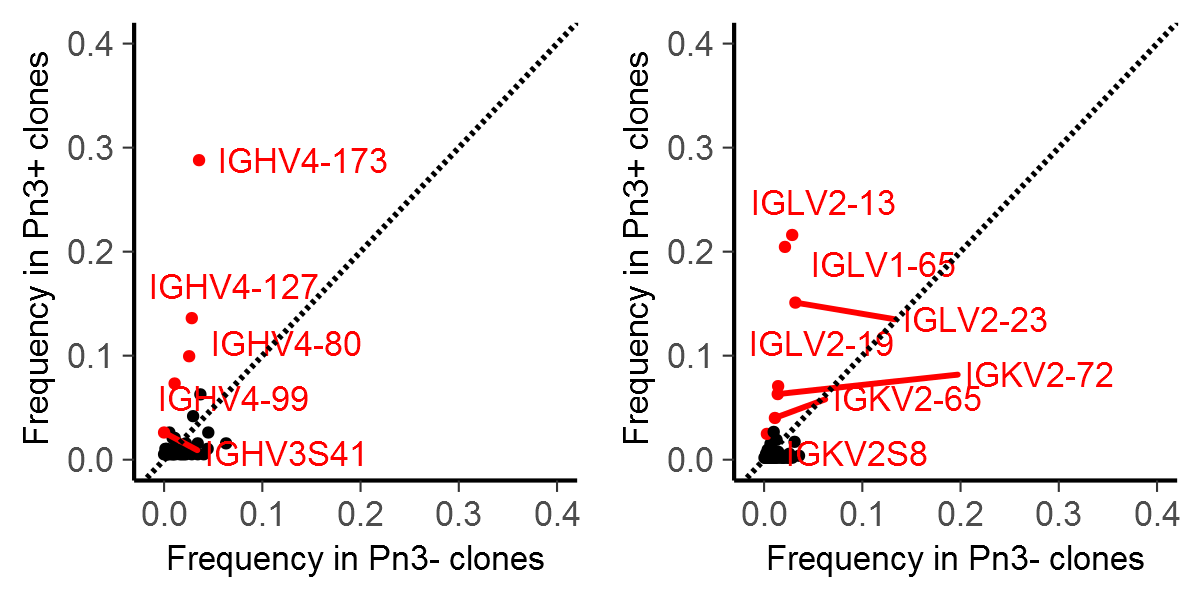

In [24]:
options(repr.plot.width = 4)
cowplot::plot_grid(g1, g2)

ggsave('RepertoirePanels/vgenes.pdf', height = 2, width = 4, useDingbats = FALSE)

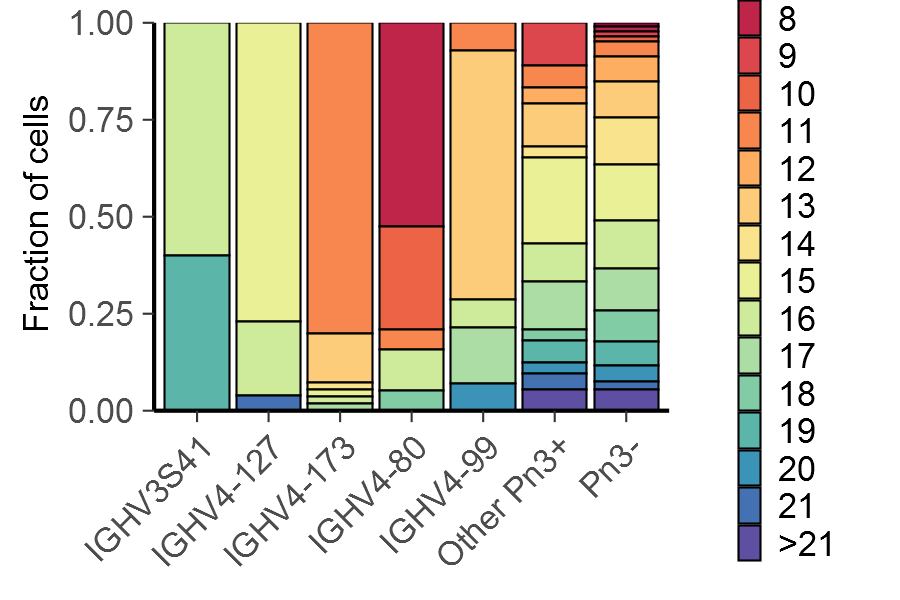

In [25]:
library(stringr)
library(RColorBrewer)

seurat$GERMLINE_V_CALL = cell_consensus_hc$GERMLINE_V_CALL[match(seurat$id, cell_consensus_hc$LANE_ID)]

options(repr.plot.width = 3)
seurat$IGHV_use = seurat$GERMLINE_V_CALL
seurat$IGHV_use = sapply(seurat$IGHV_use, function(x) str_split(x, fixed('*'))[[1]][1])


seurat$IGHV_use[seurat$Fraction == 'Pn3+' & !seurat$IGHV_use %in% hc_genes] = 'Other Pn3+'
seurat$IGHV_use[seurat$Fraction == 'Pn3+' & seurat$Group == 'Control'] = NA
seurat$IGHV_use[seurat$Fraction == 'Pn3-'] = 'Pn3-'

seurat$CDRH3_JLENGTH = str_length(seurat$IGH_CDR3)
seurat$CDRH3_JLENGTH_plot = seurat$CDRH3_JLENGTH
seurat$CDRH3_JLENGTH_plot[seurat$CDRH3_JLENGTH < 8] = '<8'
seurat$CDRH3_JLENGTH_plot[seurat$CDRH3_JLENGTH > 21] = '>21'
                         
seurat$CDRH3_JLENGTH_plot = factor(seurat$CDRH3_JLENGTH_plot, levels = c('<8', 8:21, '>21'))
                         
                         
ggplot(seurat@meta.data %>% filter(!is.na(IGHV_use), !is.na(CDRH3_JLENGTH_plot)), aes(x = IGHV_use, fill = factor(CDRH3_JLENGTH_plot))) + geom_bar(position = 'fill', color = 'black', size = .177) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
                         #scale_fill_viridis_d(option = 2, direction = 1)
                         scale_fill_manual(values = colorRampPalette(brewer.pal(10, 'Spectral'))(16)) +  theme_classic() + 
                         Axis_themes + theme(legend.key.size = unit(.2, 'cm'), axis.text.x = element_text(angle = 45, hjust = 1)) + 
                         labs(x = c(), y = 'Fraction of cells')  + scale_y_continuous(expand = c(0,0)) + labs(fill = 'CDRH3\nlength')
ggsave('Repertoirepanels/cdr3lne.pdf', height = 2, width = 2.4, useDingbats = FALSE )

In [26]:
yellows = brewer.pal(n = 9,name = 'YlOrRd')
blues = brewer.pal(n = 9,name = 'Blues')
greens = brewer.pal(n = 9,name = 'Greens')
purples = brewer.pal(n = 9,name = 'Purples')
col_light = c('IGKV2-65'=yellows[3],'IGKV2-72'=yellows[4],'IGKV2S8'=yellows[5],'IGKV3-35'=yellows[9],
              'IGLV1-65'=blues[4],'IGLV1-85'=blues[6],'IGLV1S2'=blues[9],
              'IGLV2-13'=greens[4],'IGLV2-19'=greens[6],'IGLV2-23'=greens[8],'IGLV5-95'=purples[8], 'Other IGKV/IGLV' = 'grey90')

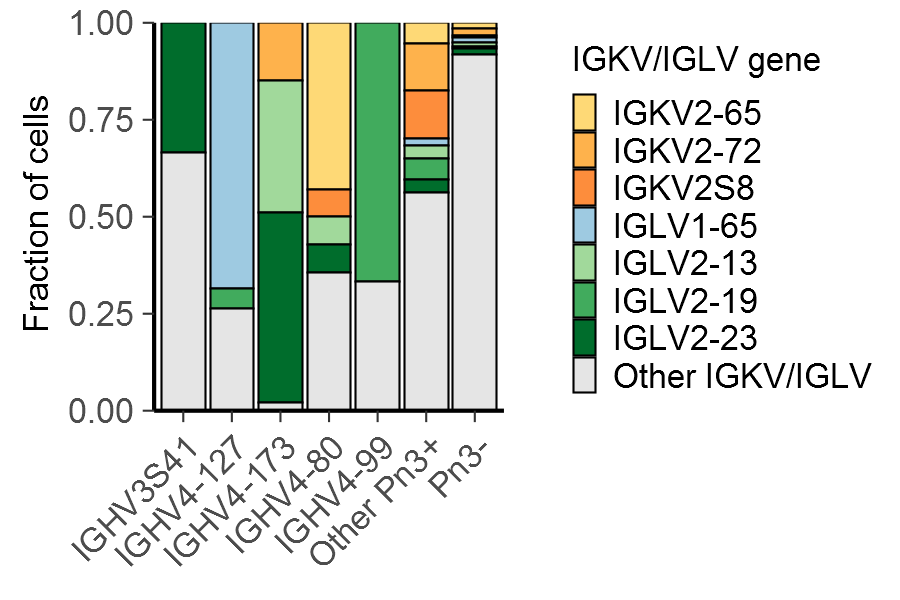

In [27]:
seurat$IGLV_use = seurat$IGLV
seurat$IGLV_use = sapply(seurat$IGLV_use, function(x) str_split(x, fixed('*'))[[1]][1])
seurat$IGLV_use[!seurat$IGLV_use %in% lc_genes] = 'Other IGKV/IGLV'
seurat$IGLV_use[is.na(seurat$IGLV)] = NA
                         
ggplot(seurat@meta.data %>% filter(!is.na(IGHV_use), !is.na(CDRH3_JLENGTH_plot), !is.na(IGLV_use)), aes(x = IGHV_use, fill = factor(IGLV_use))) + geom_bar(position = 'fill', color = 'black', size = .177) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
                         #scale_fill_viridis_d(option = 2, direction = 1)
                         #scale_fill_manual(values = c(tableau_color_pal(palette = 'Summer')(7), 'grey90'))+  theme_classic() + 
                        scale_fill_manual(values =col_light)+  theme_classic() + 

                         Axis_themes + theme(legend.key.size = unit(.2, 'cm'), axis.text.x = element_text(angle = 45, hjust = 1)) + 
                         labs(x = c(), y = 'Fraction of cells')  + scale_y_continuous(expand = c(0,0)) + labs(fill = 'IGKV/IGLV gene')
                         
ggsave('Repertoirepanels/lightchain.pdf', height = 2.05, width = 2.9, useDingbats = FALSE )

In [28]:
  seqs = seurat@meta.data %>% filter(IGHV_use == 'IGHV4-173', Fraction == 'Pn3+', Group == 'Vaccine')
    lengths = table(str_length(seqs$IGH_CDR3))
    len = names(lengths)[which.max(lengths)]

In [29]:
seurat$cdr3 = translateDNA(cell_consensus_hc$JUNCTION[match(seurat$id, cell_consensus_hc$LANE_ID)])

In [30]:
library(ggseqlogo)
i = 1
plots = list()
for (gene in hc_genes) {
    seqs = seurat@meta.data %>% filter(IGHV_use == gene, Fraction == 'Pn3+', Group == 'Vaccine')
    lengths = table(str_length(seqs$IGH_CDR3))
    len = names(lengths)[which.max(lengths)]
    
    seqs = seqs %>% filter(str_length(cdr3) == len) #%>% group_by(clone) %>% slice(1)
    print(dim(seqs))
    #num_clone = length(uniuqe())
    plots[[i]] = ggseqlogo(seqs$cdr3) + guides(fill = FALSE) + ggtitle(gene) + Axis_themes + theme(plot.title = element_text(hjust = .5) ) + 
   scale_x_continuous(limits = c(0,14), breaks = 1:13, expand = c(0,0))  
    i = i + 1
    
}

[1]  3 59


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


[1] 20 59


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


[1] 44 59


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


[1] 10 59


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


[1]  9 59


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


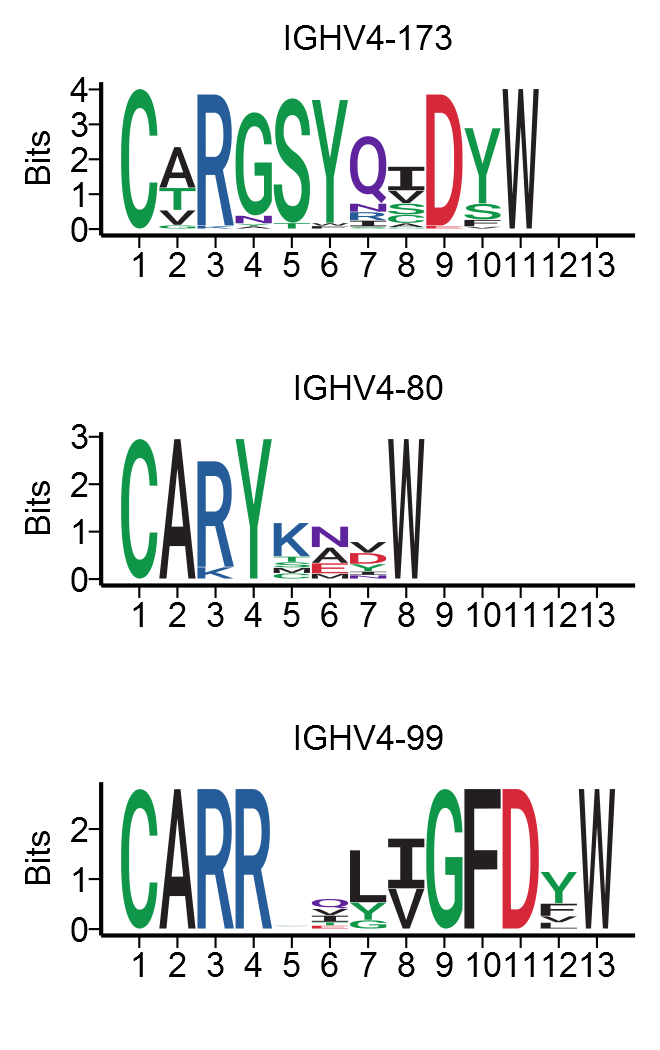

In [31]:
options(repr.plot.width = 2.2, repr.plot.height = 3.5)
cowplot::plot_grid(plots[[3]], plots[[4]], plots[[5]], ncol = 1)
ggsave('RepertoirePanels/motifs.pdf', height = 2.8, width = 2.2, useDingbats = FALSE)

In [32]:
library(pheatmap)
options(repr.plot.width = 2, repr.plot.height = 2)

seurat$IGHV_use = seurat$GERMLINE_V_CALL
seurat$IGHV_use = sapply(seurat$IGHV_use, function(x) str_split(x, fixed('*'))[[1]][1])


seurat$IGHV_use[seurat$Fraction == 'Pn3+' & !seurat$IGHV_use %in% hc_genes] = NA
#eurat$IGHV_use[seurat$Fraction == 'Pn3+' & seurat$Group == 'Control'] = NA
seurat$IGHV_use[seurat$Fraction == 'Pn3-'] = 'Pn3-'
clones = seurat@meta.data %>% filter(Fraction == 'Pn3+') %>% group_by(clone) %>% slice(1)

                         
                         
tab = table(clones$IGHV_use, clones$Monkey) %>% t()
                         rownames(tab) = c('C1', 'C2', 'C3', 'V1', 'V2', 'V3', 'V4', 'V5')
tab = tab[c(4:8, 1:3),]
meta = data.frame(row.names = rownames(tab), group = c(rep('Vaccine', 5), rep('Control', 3)))
pheatmap(tab, cluster_cols = FALSE, cluster_rows = FALSE, border_col = 'black', fontsize = 8, display_numbers = TRUE, 
         number_color = 'black', number_format = '%.0f', gaps_row = 5, 
        color = colorRampPalette(c('white', brewer.pal(9, 'OrRd')[c(2,3,5, 7)]))(17), height = 2.3, width = 2.2, annotation_row = meta, 
         annotation_color = list(group = treat_pal), angle_col = 45 , filename = 'RepertoirePanels/numclone.pdf')



In [33]:
options(repr.plot.width = 4, repr.plot.height = 2)

seurat$IGHV_use = seurat$GERMLINE_V_CALL
seurat$IGHV_use = sapply(seurat$IGHV_use, function(x) str_split(x, fixed('*'))[[1]][1])


seurat$IGHV_use[seurat$Fraction == 'Pn3+' & !seurat$IGHV_use %in% hc_genes] = NA

g2 = ggplot(seurat@meta.data %>% filter(!is.na(IGHV_use), IGHV_use %in% c('IGHV4-127', 'IGHV4-173', 'IGHV4-80', 'IGHV4-99'), !is.na(CDRH3_JLENGTH_plot), !is.na(IGLV_use), Fraction == 'Pn3+'), aes(x = Group, fill = factor(IGLV_use))) + geom_bar(position = 'fill', color = 'black', size = .177) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
                         #scale_fill_viridis_d(option = 2, direction = 1)
                         scale_fill_manual(values = c(tableau_color_pal(palette = 'Summer')(7), 'grey90'))+  theme_classic() + 
                         Axis_themes + theme(legend.key.size = unit(.2, 'cm'), axis.text.x = element_text(angle = 45, hjust = 1)) + 
                         labs(x = c(), y = 'Fraction of cells')  + scale_y_continuous(expand = c(0,0)) + labs(fill = 'IGKV/IGLV\ngene') + facet_wrap('IGHV_use', ncol = 4) + 
                         theme(strip.background = element_blank())
                         


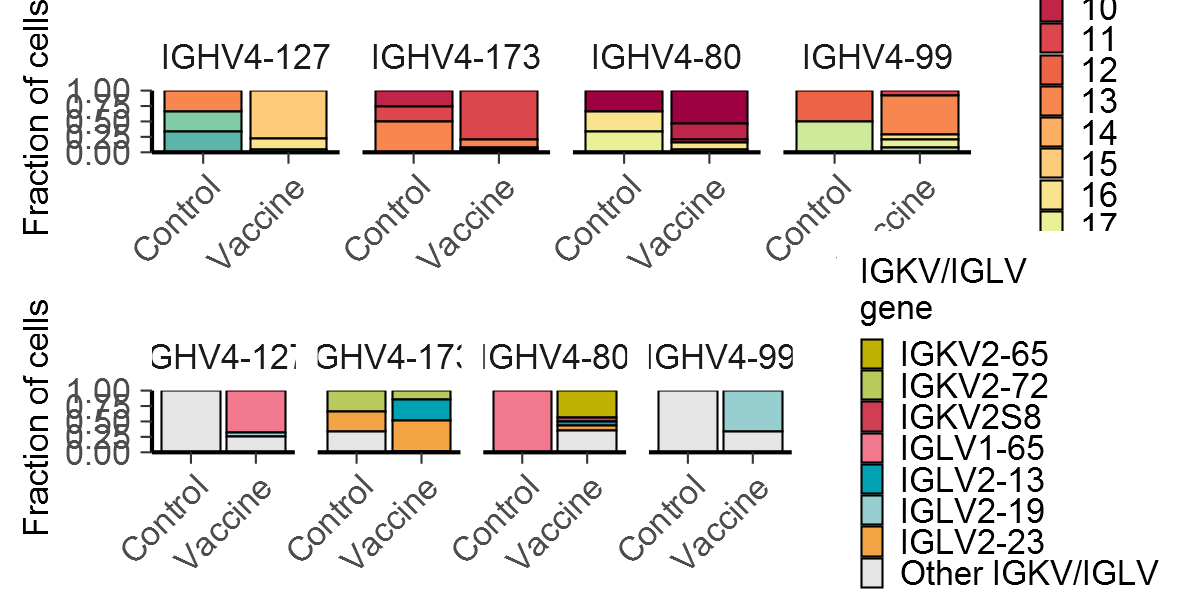

In [34]:
g1 = ggplot(seurat@meta.data %>% filter(!is.na(IGHV_use), IGHV_use %in% c('IGHV4-127', 'IGHV4-173', 'IGHV4-80', 'IGHV4-99'), !is.na(CDRH3_JLENGTH_plot), Fraction == 'Pn3+'),aes(x = Group, fill = CDRH3_JLENGTH_plot)) +
geom_bar(position = 'fill', color = 'black', size = .177) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
                         #scale_fill_viridis_d(option = 2, direction = 1)
                         scale_fill_manual(values = colorRampPalette(brewer.pal(10, 'Spectral'))(16)) +  theme_classic() + 
                         Axis_themes + theme(legend.key.size = unit(.2, 'cm'), axis.text.x = element_text(angle = 45, hjust = 1)) + 
                         labs(x = c(), y = 'Fraction of cells')  + scale_y_continuous(expand = c(0,0)) + labs(fill = 'CDRH3\nlength') + facet_wrap('IGHV_use', ncol = 4) + 
                         theme(strip.background = element_blank())
cowplot::plot_grid(g1, g2, ncol = 1)
ggsave('RepertoirePanels/vacc_comp.pdf', height = 4, width = 4.2)

In [35]:
library(ggseqlogo)
i = 1
plots2 = list()
for (gene in hc_genes) {
    seqs = seurat@meta.data %>% filter(IGHV_use == gene, Fraction == 'Pn3+', Group == 'Vaccine')
    lengths = table(str_length(seqs$IGH_CDR3))
    len = names(lengths)[which.max(lengths)]
    
    seqs = seqs %>% filter(str_length(IGH_CDR3) == len) %>% group_by(clone) %>% slice(1)
    print(dim(seqs))
    plots2[[i]] = ggseqlogo(seqs$IGH_CDR3) + guides(fill = FALSE) + ggtitle(gene) + Axis_themes + theme(plot.title = element_text(hjust = .5) )
    i = i + 1
    
}

[1]  2 59
[1]  2 59
[1] 11 59
[1]  8 59
[1]  7 59


Naive-like Fos-activated      MBC-like        B2M^hi 
            0             1             0            12

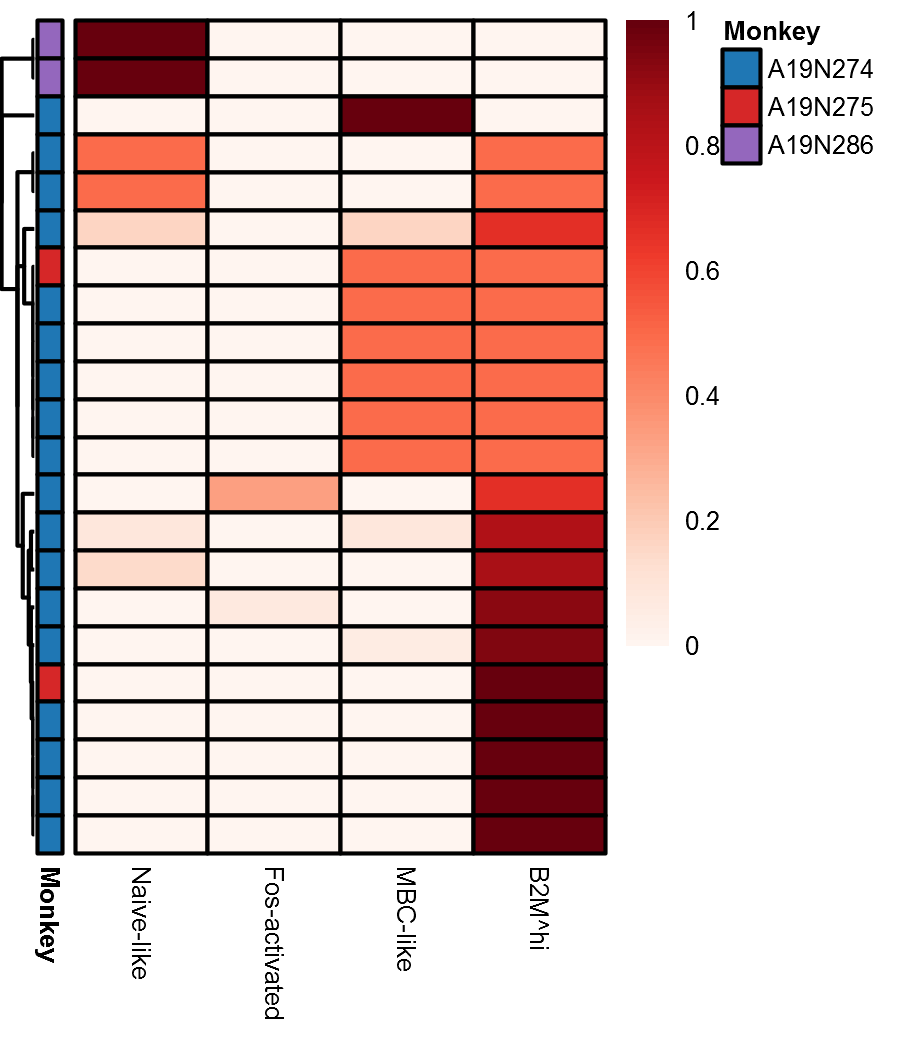

In [36]:
options(repr.plot.height =3.5, repr.plot.width = 3)
sub = seurat@meta.data %>% filter(Fraction == 'Pn3+', Group == 'Vaccine')
tab = table(sub$CLONE, sub$cluster_name)
tab = tab[rowSums(tab) > 1,]
tab['A19N274112',]
meta = data.frame(row.names = rownames(tab), Monkey = seurat$Monkey[match(rownames(tab), seurat$clone)])

pheatmap(tab/rowSums(tab), annotation_row = meta, show_rownames = FALSE, color = colorRampPalette(brewer.pal(9, 'Reds'))(100), cluster_rows = TRUE, cluster_cols = FALSE, 
         annotation_color = list(Monkey = monkey_pal[names(monkey_pal) %in% meta$Monkey]), treeheight_row = 3,fontsize = 6,
        border_color = 'black', height = 3, width = 1.7, )#filename = 'RepertoirePanels/cloneshare.pdf', angle_col = 45)


In [37]:
seurat$IGHV_use = seurat$GERMLINE_V_CALL
seurat$IGHV_use = sapply(seurat$IGHV_use, function(x) str_split(x, fixed('*'))[[1]][1])

sub = seurat@meta.data %>% filter(Group == 'Vaccine', Fraction == 'Pn3+', !is.na(IGHV), !is.na(clone))
tab = table(sub$clone, sub$cluster_name)
tab = tab[rowSums(tab) > 0,]
meta = data.frame(row.names = rownames(tab), pblike =  levels(seurat$cluster_name)[apply(tab, 1, which.max)], IGHV = seurat$IGHV_use[match(rownames(tab), seurat$clone)])#, IGLV =seurat$IGLV_use[match(rownames(tab), seurat$clone)] ) 
meta = meta %>% filter(!is.na(IGHV))
#meta$IGHV = sapply(meta$IGHV, function(x) str_split(x, fixed('*')[[1]][1]))
genes =c()
pvals = c() 
m = sum(meta$pblike == 'PB-like')
n = sum(meta$pblike != 'PB-like')

for (gene in unique(meta$IGHV)) {
    genes = c(genes, gene)
    k = sum(meta$IGHV == gene, na.rm = TRUE)
    q = sum(meta$IGHV == gene & meta$pblike == 'PB-like', na.rm = TRUE)
    pvals = c(pvals, 1-phyper(q= q, m=m, n=n,k= k))
}


df = data.frame(gene = genes, pval = pvals) %>% arrange(pval) %>% mutate(pval_adj = p.adjust(pval)) %>% head(60)
head(df)

,gene,pval,pval_adj
,<chr>,<dbl>,<dbl>
1,IGHV4-99,0,0
2,IGHV4-80,0,0
3,IGHV4-173,0,0
4,IGHV4S2,0,0
5,IGHV3-103,0,0
6,IGHV4-165,0,0


In [40]:
saveRDS(seurat, 'Pn3_seurat.RDS')